In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [0]:
from pmdarima.arima import auto_arima

In [0]:
dateparse=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d")

In [0]:
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/COALINDIA.csv',index_col='Date',parse_dates=['Date'],date_parser=dateparse)

In [0]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-02,394.799988,398.200012,386.100006,394.750000,287.604919,8425861.0
2015-03-03,373.500000,382.000000,373.000000,379.649994,291.910767,5328335.0
2015-03-04,382.000000,382.000000,370.000000,371.549988,285.682739,4497793.0
2015-03-05,372.000000,375.200012,362.000000,363.950012,279.839111,4971903.0
2015-03-09,361.899994,369.149994,356.100006,357.299988,274.725983,4555473.0
...,...,...,...,...,...,...
2020-02-24,178.750000,178.899994,173.300003,174.850006,174.850006,9952676.0
2020-02-25,176.100006,178.699997,174.199997,175.100006,175.100006,13534936.0
2020-02-26,174.199997,177.750000,172.649994,173.800003,173.800003,10925243.0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2015-03-02 to 2020-02-28
Data columns (total 6 columns):
Open         1230 non-null float64
High         1230 non-null float64
Low          1230 non-null float64
Close        1230 non-null float64
Adj Close    1230 non-null float64
Volume       1230 non-null float64
dtypes: float64(6)
memory usage: 67.3 KB


In [0]:
#Check for missing values
data.isnull().sum()/len(data)

Open         0.000812
High         0.000812
Low          0.000812
Close        0.000812
Adj Close    0.000812
Volume       0.000812
dtype: float64

In [0]:
null_data=data[pd.isnull(data).any(axis=1)]
null_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data=data.dropna()

In [0]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-02,394.799988,398.200012,386.100006,394.750000,287.604919,8425861.0
2015-03-03,373.500000,382.000000,373.000000,379.649994,291.910767,5328335.0
2015-03-04,382.000000,382.000000,370.000000,371.549988,285.682739,4497793.0
2015-03-05,372.000000,375.200012,362.000000,363.950012,279.839111,4971903.0
2015-03-09,361.899994,369.149994,356.100006,357.299988,274.725983,4555473.0
...,...,...,...,...,...,...
2020-02-24,178.750000,178.899994,173.300003,174.850006,174.850006,9952676.0
2020-02-25,176.100006,178.699997,174.199997,175.100006,175.100006,13534936.0
2020-02-26,174.199997,177.750000,172.649994,173.800003,173.800003,10925243.0


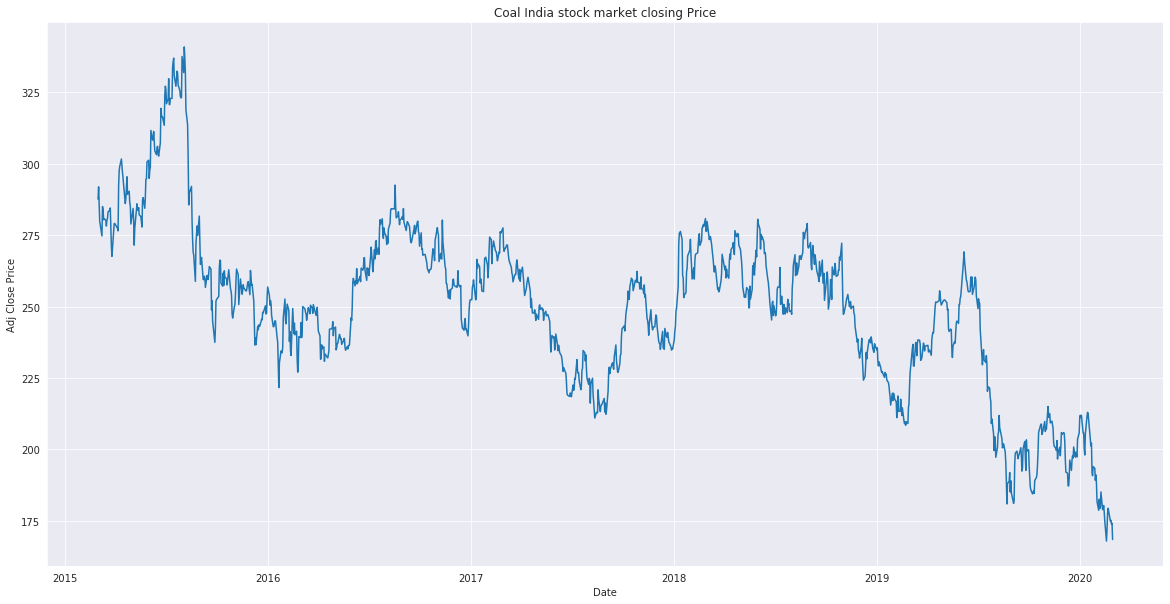

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Coal India stock market closing Price')
plt.plot(data['Adj Close'])



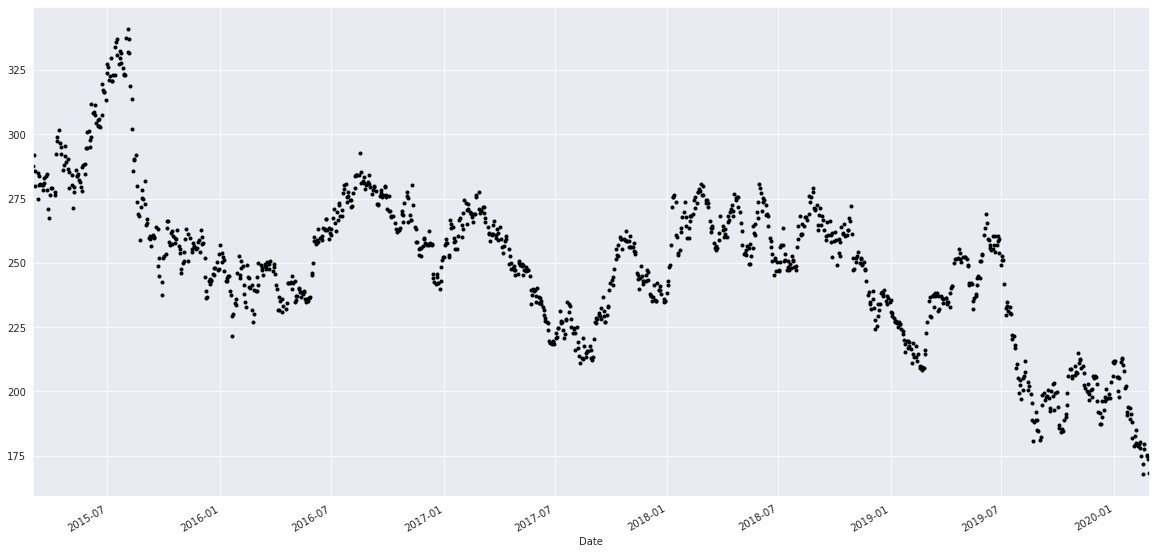

In [0]:
data_adj_close=data['Adj Close']
data_close=data['Close']
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
data_adj_close.plot(style='k.')
plt.show()



<Figure size 1440x720 with 0 Axes>

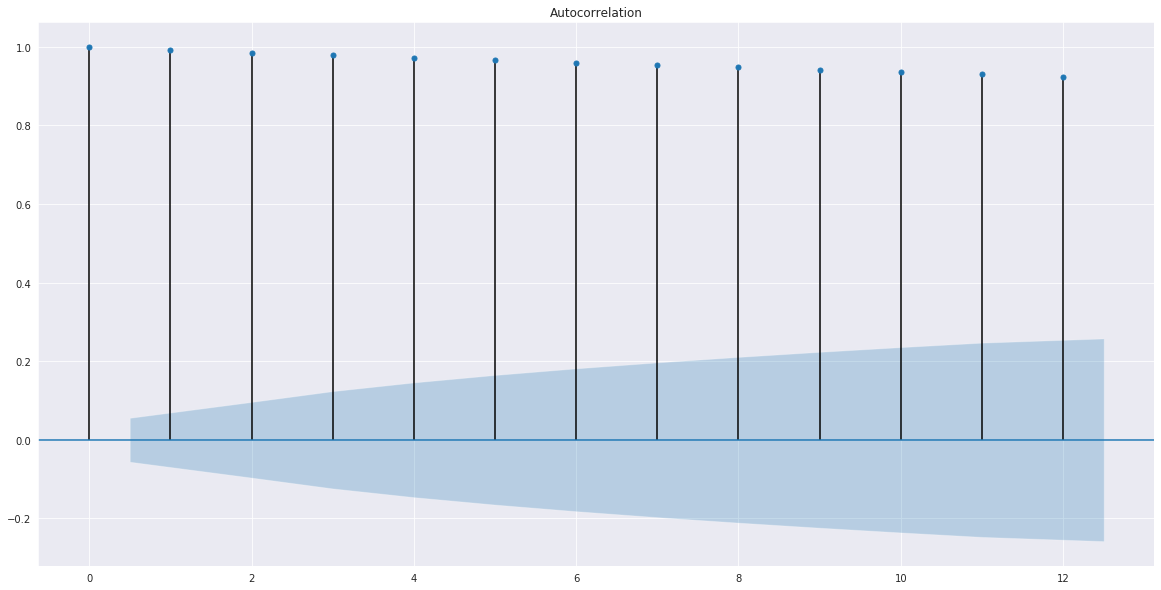

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(20,10))
plot_acf(data_close,lags=12)
plt.show()




<Figure size 1440x720 with 0 Axes>

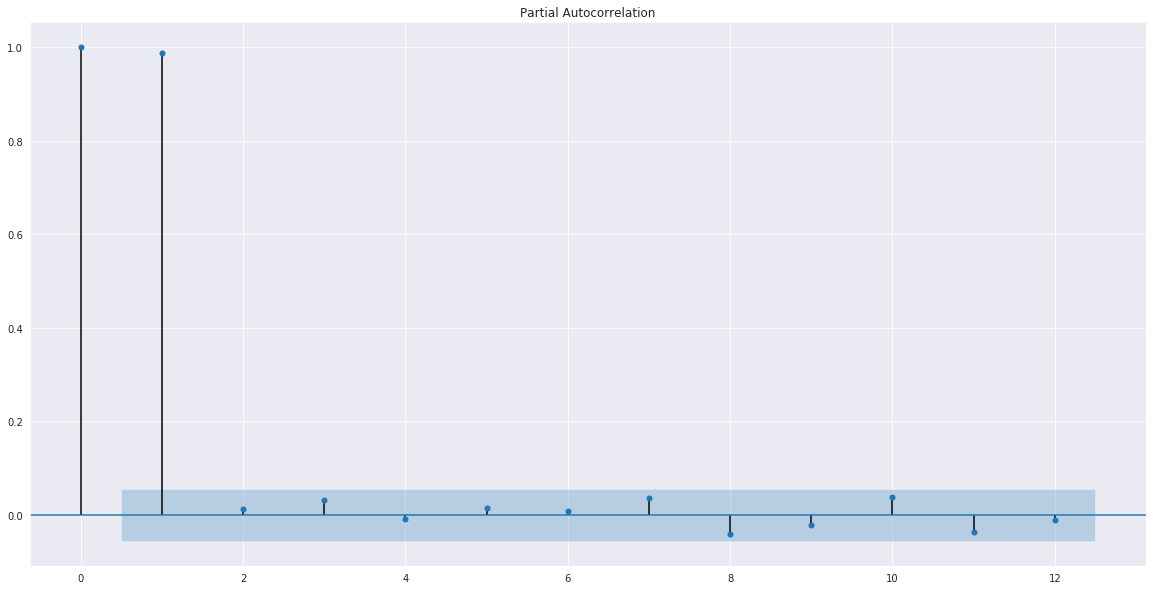

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,10))
plot_pacf(data_adj_close,lags=12)
plt.show()

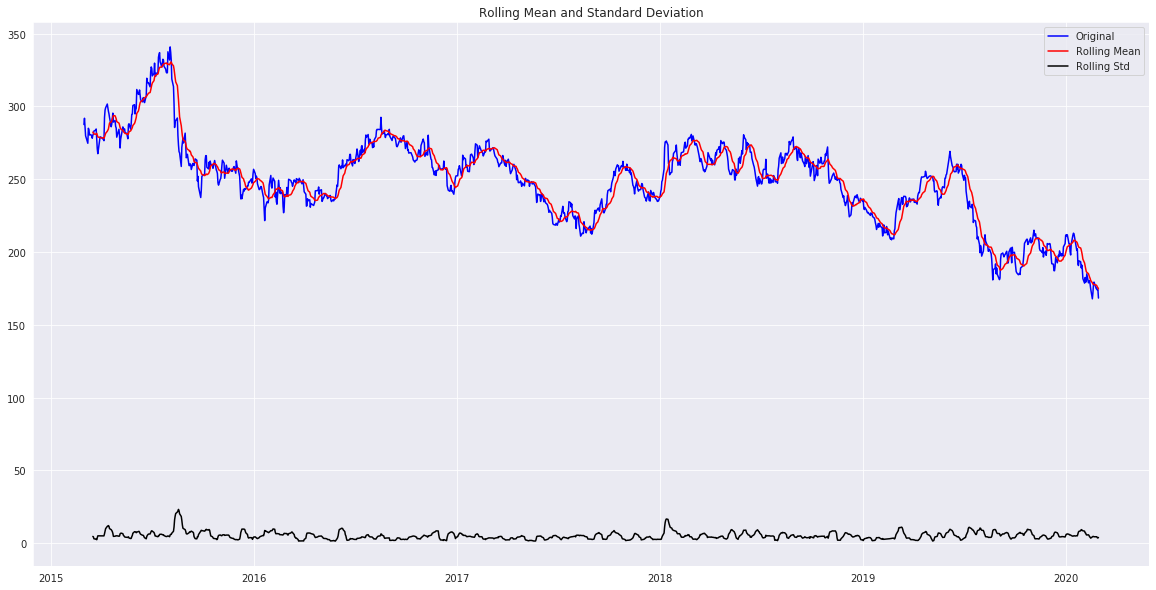

Results of dickey fuller test
Test Statistics                  -1.846721
p-value                           0.357525
No. of lags used                  0.000000
Number of observations used    1229.000000
Critical value (1%)              -3.435682
Critical value (5%)              -2.863895
Critical value (10%)             -2.568024
dtype: float64


In [0]:
#Check if the Data is stationary or not,So we perform Augmented-Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
def test_adf(timeseries):
  moving_average=timeseries.rolling(12).mean()
  moving_std=timeseries.rolling(12).std()
  plt.figure(figsize=(20,10))
  plt.plot(timeseries, color='blue',label='Original')
  plt.plot(moving_average, color='red', label='Rolling Mean')
  plt.plot(moving_std, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)
  print("Results of dickey fuller test")
  adft=adfuller(timeseries,autolag='AIC')
  output=pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,value in adft[4].items():
    output['Critical value (%s)'%key]=value
  print(output)  


test_adf(data['Adj Close'])




<Figure size 1440x720 with 0 Axes>

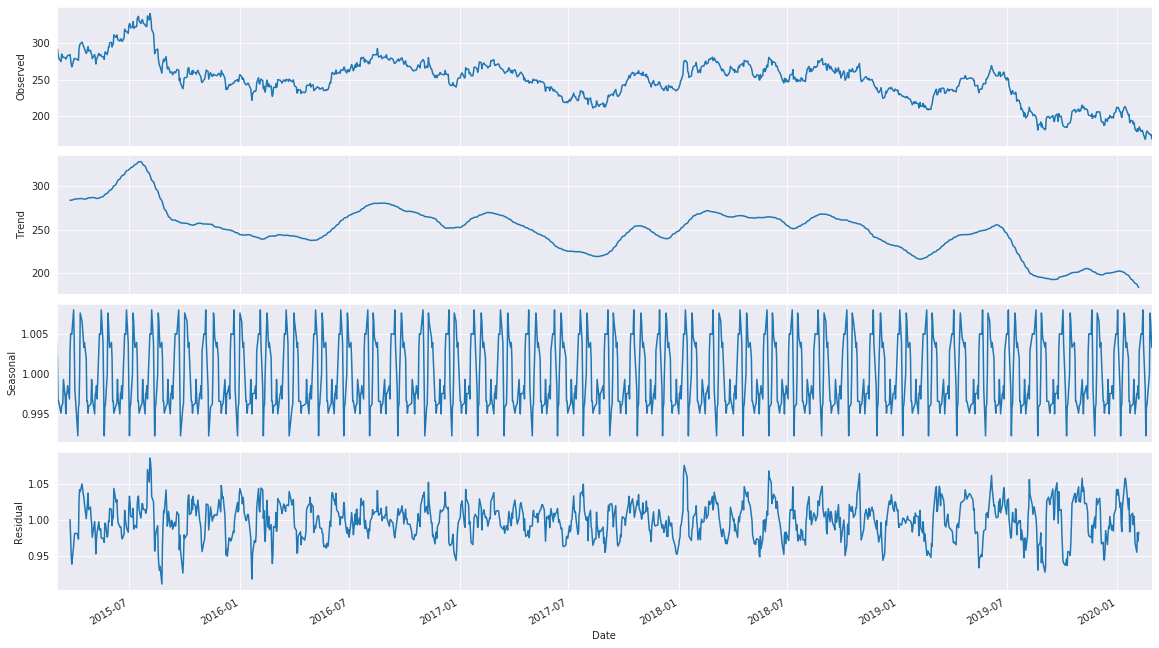

In [0]:
# So p>0.05,so we fail to reject null hypothesis,and test statistics is greater than critical values meaning Data is not stationary
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data_adj_close,model='multiplicative',freq=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16,9)


No handles with labels found to put in legend.


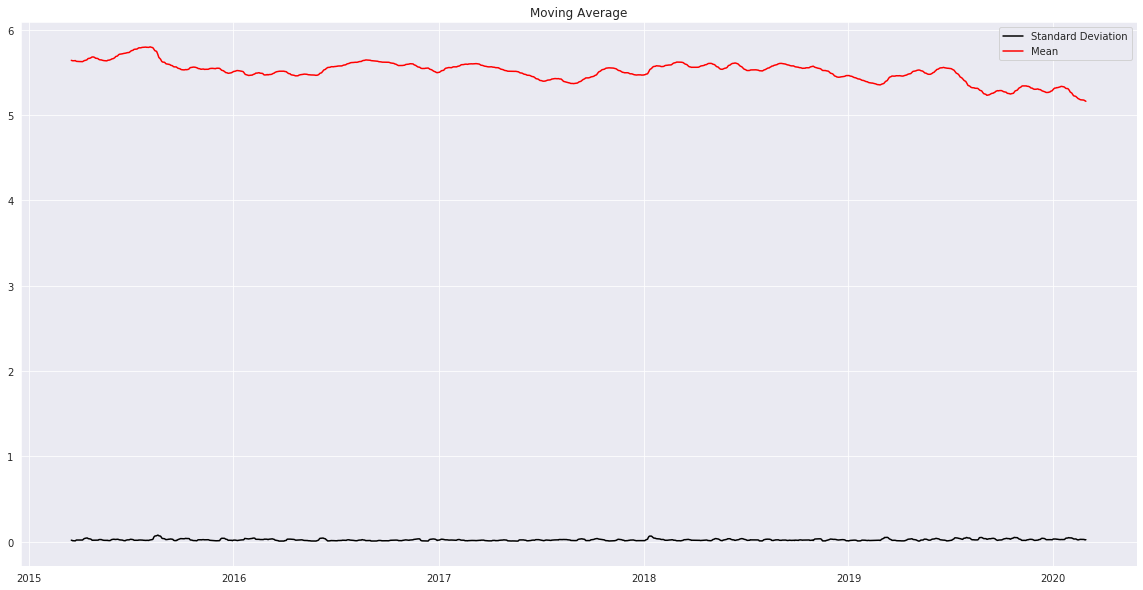

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
data_adj_close_log=np.log(data_adj_close)
moving_average=data_adj_close_log.rolling(12).mean()
std_dev=data_adj_close_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_average, color="red", label = "Mean")
plt.legend()
plt.show()



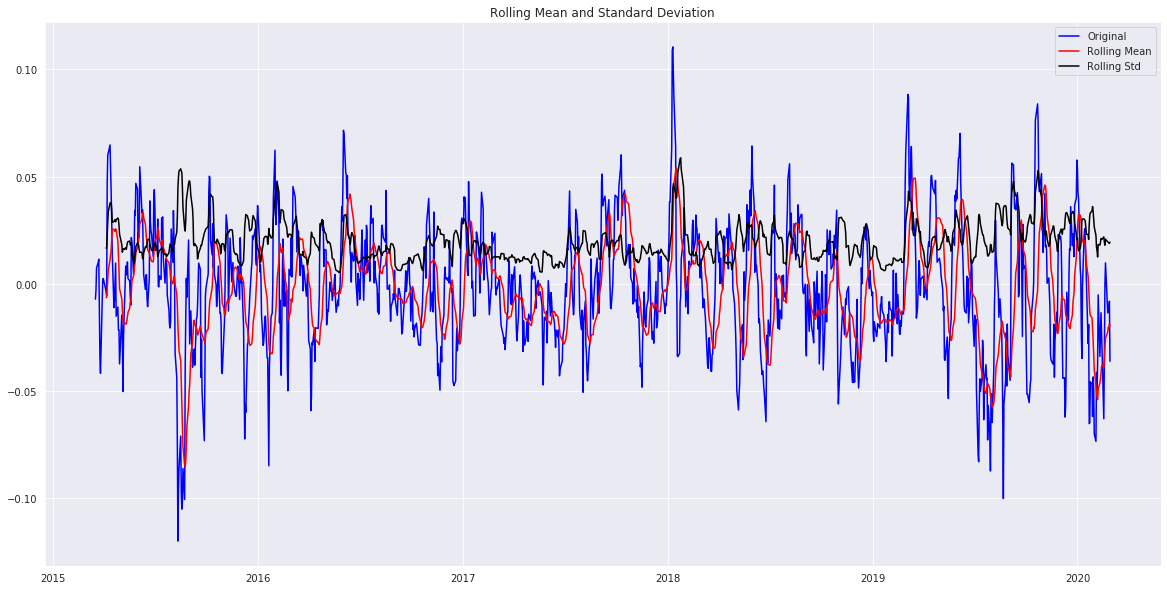

Results of dickey fuller test
Test Statistics               -1.038325e+01
p-value                        2.112072e-18
No. of lags used               4.000000e+00
Number of observations used    1.214000e+03
Critical value (1%)           -3.435748e+00
Critical value (5%)           -2.863924e+00
Critical value (10%)          -2.568039e+00
dtype: float64


In [0]:
data_log_minus_mean = data_adj_close_log - moving_average   #One technique to make time series Stationary
data_log_minus_mean.dropna(inplace=True)
test_adf(data_log_minus_mean)

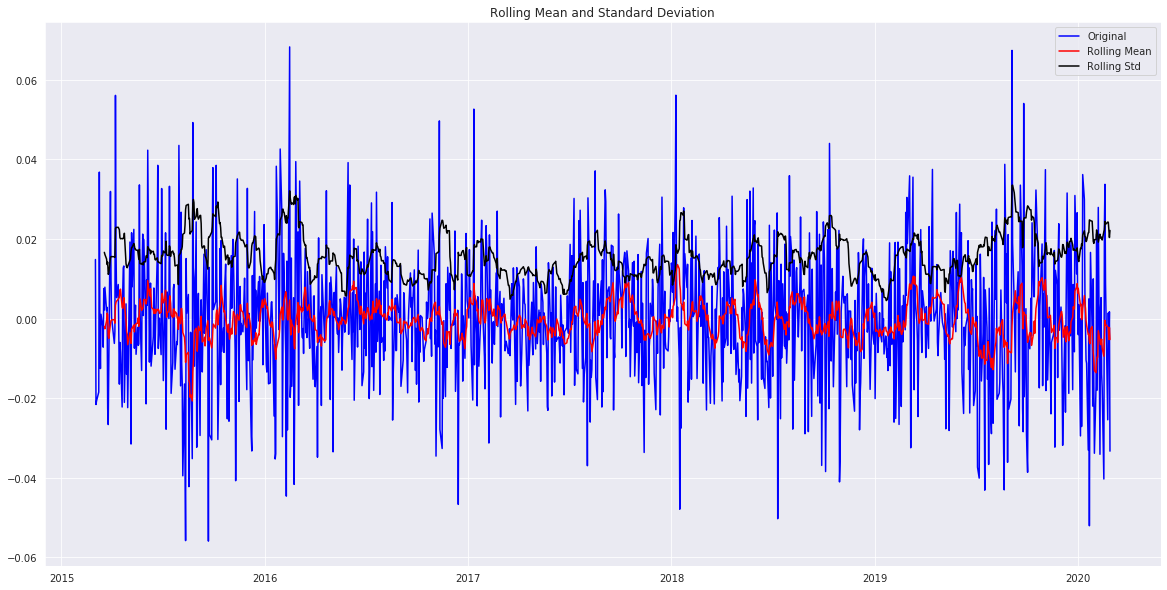

Results of dickey fuller test
Test Statistics                 -26.029538
p-value                           0.000000
No. of lags used                  1.000000
Number of observations used    1227.000000
Critical value (1%)              -3.435691
Critical value (5%)              -2.863898
Critical value (10%)             -2.568026
dtype: float64


In [0]:
df_log_shift = data_adj_close_log - data_adj_close_log.shift()  #Other technique to make time series Stationary
df_log_shift.dropna(inplace=True)
test_adf(df_log_shift)

In [0]:
data['Adj Close']=data_adj_close_log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data['Adj Close']

Date
2015-03-02    5.661588
2015-03-03    5.676448
2015-03-04    5.654882
2015-03-05    5.634215
2015-03-09    5.615774
                ...   
2020-02-24    5.163928
2020-02-25    5.165357
2020-02-26    5.157905
2020-02-27    5.159630
2020-02-28    5.126342
Name: Adj Close, Length: 1230, dtype: float64

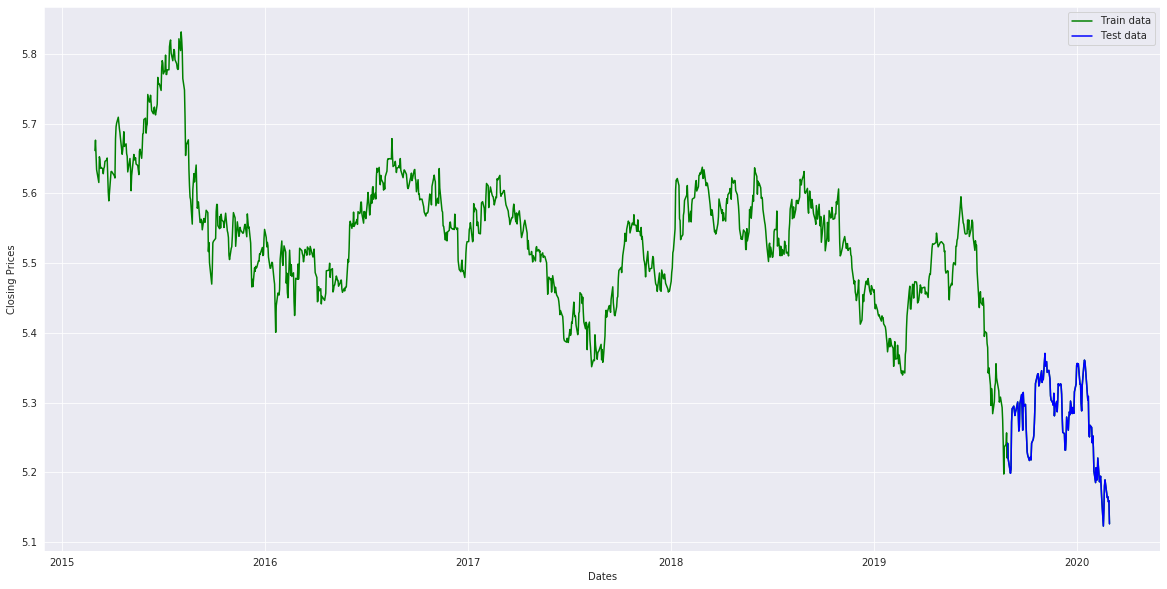

In [0]:
train_data,test_data=data_adj_close_log[:int(len(data_adj_close_log)*0.9)], data_adj_close_log[int(len(data_adj_close_log)*0.9):]
plt.figure(figsize=(20,10))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_adj_close_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [0]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=7, max_q=7, 
                      m=1,              
                      d=None,
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-6003.089, BIC=-5993.072, Time=0.158 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-6001.491, BIC=-5986.465, Time=0.448 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-6001.530, BIC=-5986.505, Time=0.412 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-6004.403, BIC=-5999.395, Time=0.109 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-5999.089, BIC=-5979.055, Time=0.535 seconds
Total fit time: 1.698 seconds


In [0]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1107
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3003.202
Date:                Sat, 29 Feb 2020   AIC                          -6004.403
Time:                        05:53:56   BIC                          -5999.395
Sample:                             0   HQIC                         -6002.509
                               - 1107                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   8.98e-06     28.532      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       55.95   Jarque-Bera (JB):                43.62
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.10
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

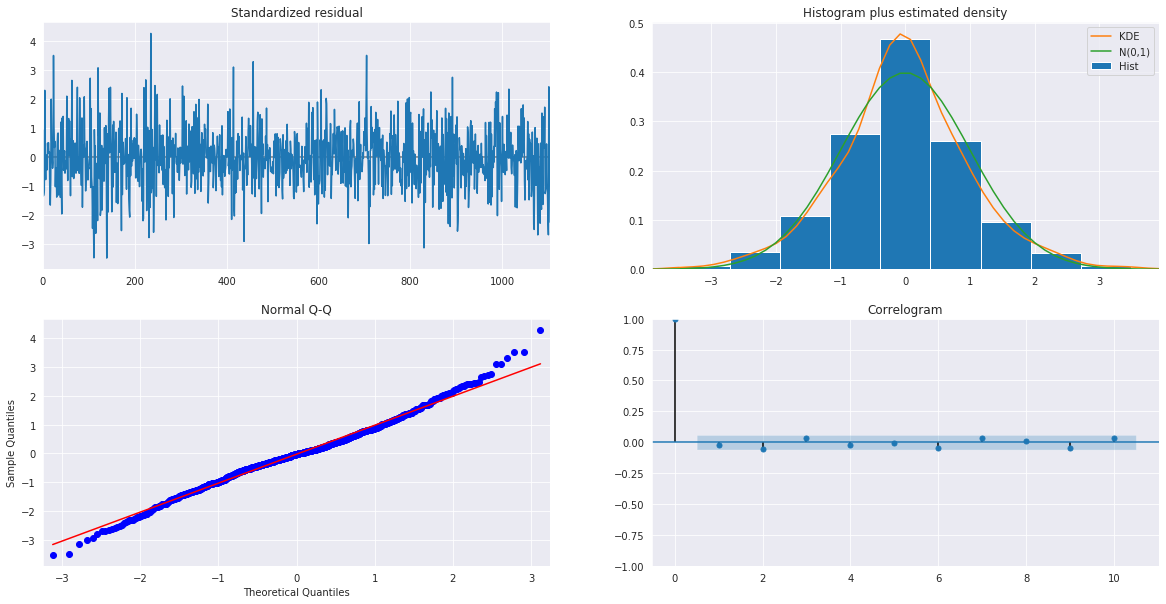

In [0]:
model_autoARIMA.plot_diagnostics(figsize=(20,10))
plt.show()

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:

data_adj_close_log

Date
2015-03-02    5.661588
2015-03-03    5.676448
2015-03-04    5.654882
2015-03-05    5.634215
2015-03-09    5.615774
                ...   
2020-02-24    5.163928
2020-02-25    5.165357
2020-02-26    5.157905
2020-02-27    5.159630
2020-02-28    5.126342
Name: Adj Close, Length: 1230, dtype: float64

In [0]:
test_data.shape

(123,)

In [0]:
fc, se, conf = fitted.forecast(123, alpha=0.05)

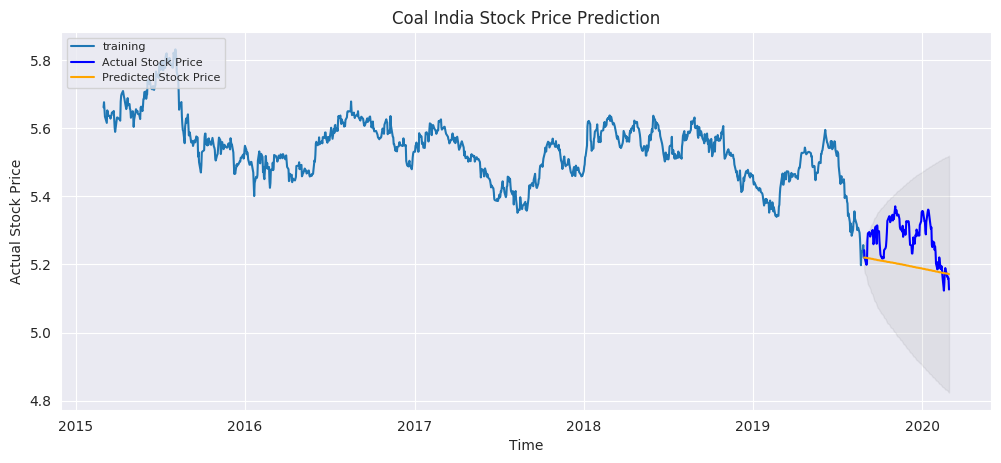

In [0]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Coal India Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
import math 
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.009337887197967546
MAE: 0.08301784470750169
RMSE: 0.09663274392237627
MAPE: 0.015642329723140214
